In [156]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import OneHotEncoder
# from sklearn import preprocessing

# Forest Type Classification

### Data Source: https://archive.ics.uci.edu/ml/datasets/Forest+type+mapping
> #### Johnson, B., Tateishi, R., Xie, Z., 2012. Using geographically-weighted variables for image classification. Remote Sensing Letters, 3 (6), 491-499.

### Data Set Information:

> #### This data set contains training and testing data from a remote sensing study which mapped different forest types based on their spectral characteristics at visible-to-near infrared wavelengths, using ASTER satellite imagery. The output (forest type map) can be used to identify and/or quantify the ecosystem services (e.g. carbon storage, erosion protection) provided by the forest.

### Load dataset

In [157]:
forest_1 = pd.read_csv(r'/Users/danielschneider/Downloads/ForestTypes/training.csv')
forest_2 = pd.read_csv(r'/Users/danielschneider/Downloads/ForestTypes/testing.csv')
forest = pd.concat([forest_1, forest_2])
forest

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,o,55,56,72,91,79,113,86,35,68,...,-12.86,-23.08,-0.08,-3.46,-27.52,-1.04,-4.73,-22.85,-1.49,-4.10
321,d,69,49,76,91,52,91,92,25,57,...,-2.36,-11.47,-0.40,-3.74,-16.90,-0.78,-4.15,-11.13,-1.48,-3.55
322,s,49,26,48,107,59,104,62,22,53,...,2.32,-23.48,1.44,-1.59,-26.98,-1.36,-4.81,-24.50,-2.53,-4.97
323,s,55,26,52,92,55,98,65,23,56,...,-0.77,-23.74,1.27,-1.30,-25.53,-1.21,-4.70,-24.39,-2.21,-4.72


### Constructing training and testing data

In [170]:
enc_dict = {'d ': 0, 'h ': 1, 's ': 2, 'o ': 3}
train, test = train_test_split(forest,test_size=0.33)

train.iloc[:,0] = train.iloc[:,0].apply(lambda x: enc_dict[x])
classes_train = array(train['class'])
encoded_train = to_categorical(classes_train)

test.iloc[:,0] = test.iloc[:,0].apply(lambda x: enc_dict[x])
classes_test = array(test['class'])
encoded_test = to_categorical(classes_test)

/Users/danielschneider/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [171]:
Y_train = encoded_train
Y_test = encoded_test

X_train = train[train.columns[1:29]]
norm_1 = MinMaxScaler().fit(X_train)
X_train = norm_1.transform(X_train)

X_test = test[test.columns[1:29]]
norm_1 = MinMaxScaler().fit(X_test)
X_test = norm_1.transform(X_test)

## Creating a dense feedforward neural network

In [172]:
#27-dimensional input, two hidden layers,
#and an output layer with a sigmoid activation function, with crossentropy loss 


model = keras.Sequential([
        layers.Input(shape=(27,)),
        layers.Dense(256, activation = 'relu'),
        layers.Dense(32, activation = 'relu'),
        layers.Dense(4, activation = 'sigmoid'),
])

#100 iterations, a batch size of 80 (3, a learning rate of 0.01, using stochastic gradient descent 
iters = 100
batch_size = 80
lr = 0.01
optim = tf.keras.optimizers.SGD(learning_rate = lr,momentum=0.9)


model.compile(
    optimizer = optim,  # Optimizer
    loss = 'categorical_crossentropy', # Loss function
    metrics = ['categorical_crossentropy', 'accuracy']

)

In [173]:
history = model.fit(
  X_train, Y_train,
  validation_data=(X_test, Y_test),
  epochs = iters,  
  batch_size = batch_size,
  validation_split = 0,
  verbose = 2,
  shuffle = True
)

Train on 350 samples, validate on 173 samples
Epoch 1/100
350/350 - 1s - loss: 1.3862 - categorical_crossentropy: 1.3862 - accuracy: 0.2914 - val_loss: 1.3684 - val_categorical_crossentropy: 1.3684 - val_accuracy: 0.4913
Epoch 2/100
350/350 - 0s - loss: 1.3399 - categorical_crossentropy: 1.3399 - accuracy: 0.4543 - val_loss: 1.3265 - val_categorical_crossentropy: 1.3265 - val_accuracy: 0.3410
Epoch 3/100
350/350 - 0s - loss: 1.2962 - categorical_crossentropy: 1.2962 - accuracy: 0.3886 - val_loss: 1.3004 - val_categorical_crossentropy: 1.3004 - val_accuracy: 0.3410
Epoch 4/100
350/350 - 0s - loss: 1.2635 - categorical_crossentropy: 1.2635 - accuracy: 0.3886 - val_loss: 1.2815 - val_categorical_crossentropy: 1.2815 - val_accuracy: 0.3410
Epoch 5/100
350/350 - 0s - loss: 1.2419 - categorical_crossentropy: 1.2419 - accuracy: 0.3886 - val_loss: 1.2684 - val_categorical_crossentropy: 1.2684 - val_accuracy: 0.3410
Epoch 6/100
350/350 - 0s - loss: 1.2246 - categorical_crossentropy: 1.2246 - ac

Epoch 48/100
350/350 - 0s - loss: 0.3515 - categorical_crossentropy: 0.3515 - accuracy: 0.8857 - val_loss: 0.4957 - val_categorical_crossentropy: 0.4957 - val_accuracy: 0.8324
Epoch 49/100
350/350 - 0s - loss: 0.3455 - categorical_crossentropy: 0.3455 - accuracy: 0.8857 - val_loss: 0.4723 - val_categorical_crossentropy: 0.4723 - val_accuracy: 0.8555
Epoch 50/100
350/350 - 0s - loss: 0.3443 - categorical_crossentropy: 0.3443 - accuracy: 0.8914 - val_loss: 0.4593 - val_categorical_crossentropy: 0.4593 - val_accuracy: 0.8555
Epoch 51/100
350/350 - 0s - loss: 0.3398 - categorical_crossentropy: 0.3398 - accuracy: 0.8743 - val_loss: 0.4724 - val_categorical_crossentropy: 0.4724 - val_accuracy: 0.8439
Epoch 52/100
350/350 - 0s - loss: 0.3337 - categorical_crossentropy: 0.3337 - accuracy: 0.8800 - val_loss: 0.4849 - val_categorical_crossentropy: 0.4849 - val_accuracy: 0.8324
Epoch 53/100
350/350 - 0s - loss: 0.3322 - categorical_crossentropy: 0.3322 - accuracy: 0.8943 - val_loss: 0.4893 - val_

Epoch 95/100
350/350 - 0s - loss: 0.2704 - categorical_crossentropy: 0.2704 - accuracy: 0.8971 - val_loss: 0.4411 - val_categorical_crossentropy: 0.4411 - val_accuracy: 0.8728
Epoch 96/100
350/350 - 0s - loss: 0.2517 - categorical_crossentropy: 0.2517 - accuracy: 0.9114 - val_loss: 0.4339 - val_categorical_crossentropy: 0.4339 - val_accuracy: 0.8613
Epoch 97/100
350/350 - 0s - loss: 0.2852 - categorical_crossentropy: 0.2852 - accuracy: 0.9086 - val_loss: 0.4279 - val_categorical_crossentropy: 0.4279 - val_accuracy: 0.8728
Epoch 98/100
350/350 - 0s - loss: 0.2579 - categorical_crossentropy: 0.2579 - accuracy: 0.9143 - val_loss: 0.4406 - val_categorical_crossentropy: 0.4406 - val_accuracy: 0.8613
Epoch 99/100
350/350 - 0s - loss: 0.2562 - categorical_crossentropy: 0.2562 - accuracy: 0.9143 - val_loss: 0.4284 - val_categorical_crossentropy: 0.4284 - val_accuracy: 0.8728
Epoch 100/100
350/350 - 0s - loss: 0.2588 - categorical_crossentropy: 0.2588 - accuracy: 0.9200 - val_loss: 0.4327 - val

Train: 0.920, Test: 0.861


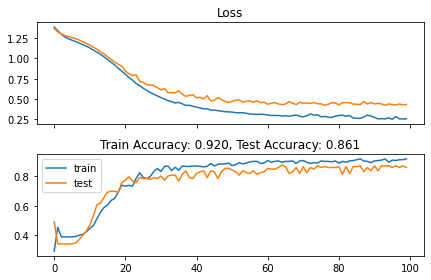

In [174]:
train_acc = model.evaluate(X_train, Y_train, verbose=0)
test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc[2], test_acc[2]))

# #Plotting Accuracy and Loss
fig, (ax1,ax2) = plt.subplots(2, sharex=True)

#Loss
ax1.set_title('Loss')
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='test')

#Accuracy
ax2.set_title('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc[2], test_acc[2]))
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='test')

fig.tight_layout()
plt.legend()